# Plot Regional Climatologies from each EBR regions with complementary seasonal mean wind speed  regional snap shots of spatially averaged region 

In [1]:
%matplotlib inline

Use the sys library in order to tell the notebook to look for files within the followinf directory path: 

In [2]:
import sys
sys.path.append('/zdata/home/lcolosi/python_functions/')

Import all libraries and functions

In [3]:
#libraries
import numpy as np #contains the major of functions used for matrix arrays  
import matplotlib.pyplot as plt # matplotlib contains functions for graphics and plot manipulation
from netCDF4 import Dataset, num2date # netCDF4 handles netCDF files
import datetime
#plotting libraries
import cmocean.cm as cmo
from matplotlib import cm 
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.mpl.ticker as cticker
from matplotlib.colors import LogNorm
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib import ticker
import matplotlib
from numpy import pi


#my functions
from unweighted_least_square_fit import least_square_fit 
from char_LSF_curve import character_LSF
from monthly_mean import monthly_average
import cartopy_fig_module as cart
from set_cartopy_gridlines import grid_labels_lines
from reg_clima_plot import region_clima_plot

Begin by looking at the EBRs in seaonal mean progressions when the increase in wind speed occurs in order to determine the exact gridbox that the climatolgy will be spatially averaged over 

Call statistical moments of ccmp_v2 data seasonally averaged 

In [4]:
ccmp2_stat_moments = np.load('/zdata/downloads/colosi_data_bk/npz_data/stat_moments/CCMP_v2/ccmp_v2_stat_moms.npz')

Assign variables 

In [5]:
wsp_mean_s = ccmp2_stat_moments['wsp_mean_s']
wsp_var_s = ccmp2_stat_moments['wsp_var_s']
wsp_skew_s = ccmp2_stat_moments['wsp_skew_s']
wsp_kurt_s = ccmp2_stat_moments['wsp_kurt_s']

Define spatial variables

In [6]:
lon = np.arange(0,360,1)
lat = np.arange(-66,67,1)

Plot each of the wind speed seasonally averaged map zoomed into each EBR for the months of DJF for the Southern hemisphere and JJA for the Northern hemisphere. Split the northern and southern hemisphere up so that the JJA seasonal average does not get confused with the DJF seasona average 

### Northern hemisphere 

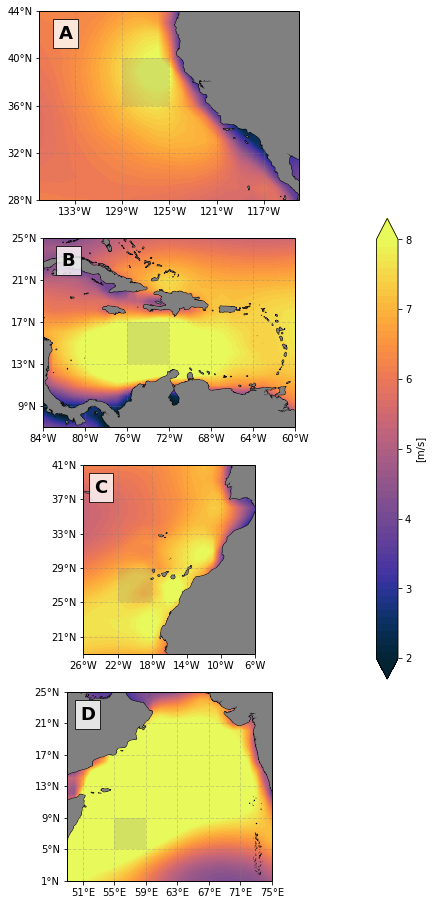

In [7]:
projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '10m'

fig, axes = plt.subplots(4, 1, figsize=(10,16),
                        subplot_kw={'projection': projection})
ax1, ax2, ax3, ax4 = axes.flatten()

############## Subplot 1  #################
#California coast
cart.set_subplots(ax1, projection, resolution, lon_min=44, lon_max=66, lat_min=30, lat_max=44)
levels = np.arange(2, 8.1, 0.1)
cs1 = ax1.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
#cs1 = ax1.pcolor(lon, lat, wsp_mean_s[2,:,:], vmin=0, vmax=8, cmap=cmo.thermal, 
#                 transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax1, xticks = [-133, -129, -125, -121, -117], yticks = [28, 32, 36, 40, 44], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
#left, bottom, width, height
cax1 = plt.axes([.80, .3, 0.03, 0.4])
cart.set_cbar(cs1, cax1, fig, orientation='vertical', cbar_label ='[m/s]', nbins = 7, fontsize = 10, cbar_ticks=[], task='regular')
#cart.set_axes_label(ax1, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 18)
ax1.add_patch(mpatches.Rectangle(xy=[-129, 36], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))
ax1.set_aspect(aspect='equal', adjustable='box')

############## Subplot 2  #################
#South Caribbean
cart.set_subplots(ax2, projection, resolution, lon_min=97, lon_max=119, lat_min=7, lat_max=24)
levels = np.arange(2, 8.1, 0.1)
cs2 = ax2.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax2, xticks = [-84, -80, -76, -72, -68, -64, -60], yticks = [9, 13, 17, 21, 25], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax2, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'B', fs_shade = 28, fs_main = 18)
ax2.add_patch(mpatches.Rectangle(xy=[-76, 13], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))
ax2.set_aspect(aspect='equal', adjustable='box')

# ############## Subplot 3  #################
#North Africa
cart.set_subplots(ax3, projection, resolution, lon_min=154, lon_max=174, lat_min=19, lat_max=34)
levels = np.arange(2, 8.1, 0.1)
cs3 = ax3.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax3, xticks = [-26, -22, -18, -14, -10, -6], yticks = [21, 25, 29, 33, 37, 41], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'C', fs_shade = 28, fs_main = 18)
ax3.add_patch(mpatches.Rectangle(xy=[-22, 25], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))
ax3.set_aspect(aspect='equal', adjustable='box')

# ############## Subplot 4  #################
# #Arabian Sea 
cart.set_subplots(ax4, projection, resolution, lon_min=-131, lon_max=-109, lat_min=6, lat_max=23)
levels = np.arange(2, 8.1, 0.1)
cs4 = ax4.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax4, xticks = [51, 55, 59, 63, 67, 71, 75], yticks = [1, 5, 9, 13, 17, 21, 25], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax4, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'D', fs_shade = 28, fs_main = 18)
ax4.add_patch(mpatches.Rectangle(xy=[55, 5], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))
ax4.set_aspect(aspect='equal', adjustable='box')

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.21, hspace = 0.2)

#save figure 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/CCMP2_reg_JJA_nh_zoom', bbox_inches = 'tight', dpi=300)

### Southern hemisphere 

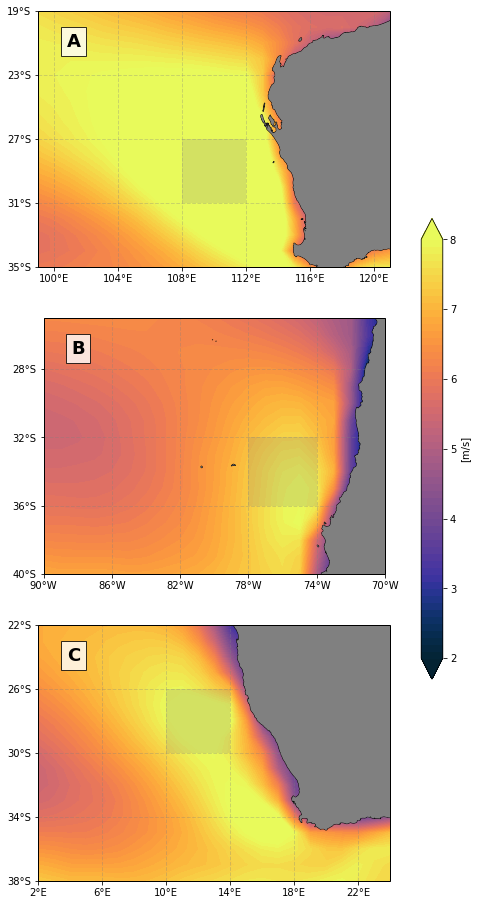

In [8]:
projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '10m'

fig, axes = plt.subplots(3, 1, figsize=(10,16),
                        subplot_kw={'projection': projection})
ax1, ax2, ax3 = axes.flatten()

############## Subplot 1  #################
#West coast of Australia
cart.set_subplots(ax1, projection, resolution, lon_min=-81, lon_max=-59, lat_min=-35, lat_max=-20)
levels = np.arange(2, 8.1, 0.1)
cs1 = ax1.contourf(lon, lat, wsp_mean_s[0,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
#cs1 = ax1.pcolor(lon, lat, wsp_mean_s[2,:,:], vmin=0, vmax=8, cmap=cmo.thermal, 
#                 transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax1, xticks = [100, 104, 108, 112, 116, 120], yticks = [-35, -31, -27, -23, -19], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
#left, bottom, width, height
cax1 = plt.axes([.80, .3, 0.03, 0.4])
cart.set_cbar(cs1, cax1, fig, orientation='vertical', cbar_label ='[m/s]', nbins = 7, fontsize = 10, cbar_ticks=[], task='regular')
#cart.set_axes_label(ax1, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 18)
ax1.add_patch(mpatches.Rectangle(xy=[108, -31], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))
############## Subplot 2  #################
#Chile-Peru Coast 
cart.set_subplots(ax2, projection, resolution, lon_min=92, lon_max=109, lat_min=-40, lat_max=-25)
levels = np.arange(2, 8.1, 0.1)
cs2 = ax2.contourf(lon, lat, wsp_mean_s[0,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax2, xticks = [-90, -86, -82, -78, -74, -70], yticks = [-40, -36, -32, -28], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
#cax2 = plt.axes([.92, .71, 0.01, 0.16])
#cart.set_cbar(cs2, cax2, fig, cbar_label ='[m]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax2, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 10)
cart.subplot_label(ax2, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'B', fs_shade = 28, fs_main = 18)
ax2.add_patch(mpatches.Rectangle(xy=[-78, -36], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

# ############## Subplot 3  #################
#Coast of Namibia
cart.set_subplots(ax3, projection, resolution, lon_min=-178, lon_max=-156, lat_min=-38, lat_max=-23)
levels = np.arange(2, 8.1, 0.1)
cs3 = ax3.contourf(lon, lat, wsp_mean_s[0,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax3, xticks = [2, 6, 10, 14, 18, 22], yticks = [-38, -34, -30, -26, -22], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
#cax3 = plt.axes([.47, .42, 0.01, 0.16])
#cart.set_cbar(cs3, cax3, fig, cbar_label ='[m]', nbins = 5, fontsize = 10)
#cart.set_axes_label(ax3, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'C', fs_shade = 28, fs_main = 18)
ax3.add_patch(mpatches.Rectangle(xy=[10, -30], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.21, hspace = 0.2)

#save figure 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/CCMP2_reg_DJF_sh_zoom', bbox_inches = 'tight', dpi=300)

Import data for Ifremer SWH and CCMP2 WSP regional climatologies from .npz files for each EBR

### West Australia 

###### Ifremer SWH and CCMP2 WSP Climatology with seasonal cycle

In [9]:
ifremer_swh_wa = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/west_australia/west_australia_ifremer.npz')
ccmp2_wsp_wa = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/west_australia/west_australia_ccmp2.npz')

###### WW3 comparison 

In [10]:
ww3_swh_wsp_wa = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/west_australia/west_australia_ww3.npz')

Redefine variables 

In [11]:
#For ifremer swh
swh_mean_wa = ifremer_swh_wa['swh_mean']
swh_stdm_wa = ifremer_swh_wa['swh_stdm']
swh_hfit_wa = ifremer_swh_wa['swh_hfit']
swh_gc_wa = ifremer_swh_wa['grid_cor']

#For CCMP2 wsp 
wsp_mean_wa = ccmp2_wsp_wa['wsp_mean']
wsp_stdm_wa = ccmp2_wsp_wa['wsp_stdm']
wsp_hfit_wa = ccmp2_wsp_wa['wsp_hfit']
wsp_gc_wa = ccmp2_wsp_wa['grid_cor']

#For WW3 SWH and WSP
swh_model_mean_wa = ww3_swh_wsp_wa['swh_mean']
swh_model_stdm_wa = ww3_swh_wsp_wa['swh_stdm']
wsp_model_mean_wa = ww3_swh_wsp_wa['wsp_mean']
wsp_model_stdm_wa = ww3_swh_wsp_wa['wsp_stdm']

### North California  

###### Ifremer SWH and CCMP2 WSP Climatology with seasonal cycle

In [12]:
ifremer_swh_nc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/northern_california/california_ifremer.npz')
ccmp2_wsp_nc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/northern_california/california_ccmp2.npz')

###### WW3 comparison 

In [13]:
ww3_swh_wsp_nc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/northern_california/california_ww3.npz')

Redefine variables 

In [14]:
#For ifremer swh
swh_mean_nc = ifremer_swh_nc['swh_mean']
swh_stdm_nc = ifremer_swh_nc['swh_stdm']
swh_hfit_nc = ifremer_swh_nc['swh_hfit']
swh_gc_nc = ifremer_swh_nc['grid_cor']

#For CCMP2 wsp 
wsp_mean_nc = ccmp2_wsp_nc['wsp_mean']
wsp_stdm_nc = ccmp2_wsp_nc['wsp_stdm']
wsp_hfit_nc = ccmp2_wsp_nc['wsp_hfit']
wsp_gc_nc = ccmp2_wsp_nc['grid_cor']

#For WW3 SWH and WSP
swh_model_mean_nc = ww3_swh_wsp_nc['swh_mean']
swh_model_stdm_nc = ww3_swh_wsp_nc['swh_stdm']
wsp_model_mean_nc = ww3_swh_wsp_nc['wsp_mean']
wsp_model_stdm_nc = ww3_swh_wsp_nc['wsp_stdm']

### North Africa 

###### Ifremer SWH and CCMP2 WSP Climatology with seasonal cycle

In [15]:
ifremer_swh_na = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/north_africa/north_africa_ifremer.npz')
ccmp2_wsp_na = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/north_africa/north_africa_ccmp2.npz')

###### WW3 comparison 

In [16]:
ww3_swh_wsp_na = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/north_africa/north_africa_ww3.npz')

Redefine variables 

In [17]:
#For ifremer swh
swh_mean_na = ifremer_swh_na['swh_mean']
swh_stdm_na = ifremer_swh_na['swh_stdm']
swh_hfit_na = ifremer_swh_na['swh_hfit']
swh_gc_na = ifremer_swh_na['grid_cor']

#For CCMP2 wsp 
wsp_mean_na = ccmp2_wsp_na['wsp_mean']
wsp_stdm_na = ccmp2_wsp_na['wsp_stdm']
wsp_hfit_na = ccmp2_wsp_na['wsp_hfit']
wsp_gc_na = ccmp2_wsp_na['grid_cor']

#For WW3 SWH and WSP
swh_model_mean_na = ww3_swh_wsp_na['swh_mean']
swh_model_stdm_na = ww3_swh_wsp_na['swh_stdm']
wsp_model_mean_na = ww3_swh_wsp_na['wsp_mean']
wsp_model_stdm_na = ww3_swh_wsp_na['wsp_stdm']

### South Caribbean 

###### Ifremer SWH and CCMP2 WSP Climatology with seasonal cycle

In [18]:
ifremer_swh_sc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/south_caribbean/south_caribbean_ifremer.npz')
ccmp2_wsp_sc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/south_caribbean/south_caribbean_ccmp2.npz')

###### WW3 comparison 

In [19]:
ww3_swh_wsp_sc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/south_caribbean/south_caribbean_ww3.npz')

Redefine variables 

In [20]:
#For ifremer swh
swh_mean_sc = ifremer_swh_sc['swh_mean']
swh_stdm_sc = ifremer_swh_sc['swh_stdm']
swh_hfit_sc = ifremer_swh_sc['swh_hfit']
swh_gc_sc = ifremer_swh_sc['grid_cor']

#For CCMP2 wsp 
wsp_mean_sc = ccmp2_wsp_sc['wsp_mean']
wsp_stdm_sc = ccmp2_wsp_sc['wsp_stdm']
wsp_hfit_sc = ccmp2_wsp_sc['wsp_hfit']
wsp_gc_sc = ccmp2_wsp_sc['grid_cor']

#For WW3 SWH and WSP
swh_model_mean_sc = ww3_swh_wsp_sc['swh_mean']
swh_model_stdm_sc = ww3_swh_wsp_sc['swh_stdm']
wsp_model_mean_sc = ww3_swh_wsp_sc['wsp_mean']
wsp_model_stdm_sc = ww3_swh_wsp_sc['wsp_stdm']

### South Africa (Coast of Namibia) 

###### Ifremer SWH and CCMP2 WSP Climatology with seasonal cycle

In [21]:
ifremer_swh_sa = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/south_africa/south_africa_ifremer.npz')
ccmp2_wsp_sa = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/south_africa/south_africa_ccmp2.npz')

###### WW3 comparison 

In [22]:
ww3_swh_wsp_sa = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/south_africa/south_africa_ww3.npz')

Redefine variables 

In [23]:
#For ifremer swh
swh_mean_sa = ifremer_swh_sa['swh_mean']
swh_stdm_sa = ifremer_swh_sa['swh_stdm']
swh_hfit_sa = ifremer_swh_sa['swh_hfit']
swh_gc_sa = ifremer_swh_sa['grid_cor']

#For CCMP2 wsp 
wsp_mean_sa = ccmp2_wsp_sa['wsp_mean']
wsp_stdm_sa = ccmp2_wsp_sa['wsp_stdm']
wsp_hfit_sa = ccmp2_wsp_sa['wsp_hfit']
wsp_gc_sa = ccmp2_wsp_sa['grid_cor']

#For WW3 SWH and WSP
swh_model_mean_sa = ww3_swh_wsp_sa['swh_mean']
swh_model_stdm_sa = ww3_swh_wsp_sa['swh_stdm']
wsp_model_mean_sa = ww3_swh_wsp_sa['wsp_mean']
wsp_model_stdm_sa = ww3_swh_wsp_sa['wsp_stdm']

### Peru and Chile Coast 

###### Ifremer SWH and CCMP2 WSP Climatology with seasonal cycle

In [24]:
ifremer_swh_pc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/peru_chile_coast/peru_chile_ifremer.npz')
ccmp2_wsp_pc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/peru_chile_coast/peru_chile_ccmp2.npz')

###### WW3 comparison 

In [25]:
ww3_swh_wsp_pc = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/peru_chile_coast/peru_chile_ww3.npz')

Redefine variables 

In [26]:
#For ifremer swh
swh_mean_pc = ifremer_swh_pc['swh_mean']
swh_stdm_pc = ifremer_swh_pc['swh_stdm']
swh_hfit_pc = ifremer_swh_pc['swh_hfit']
swh_gc_pc = ifremer_swh_pc['grid_cor']

#For CCMP2 wsp 
wsp_mean_pc = ccmp2_wsp_pc['wsp_mean']
wsp_stdm_pc = ccmp2_wsp_pc['wsp_stdm']
wsp_hfit_pc = ccmp2_wsp_pc['wsp_hfit']
wsp_gc_pc = ccmp2_wsp_pc['grid_cor']

#For WW3 SWH and WSP
swh_model_mean_pc = ww3_swh_wsp_pc['swh_mean']
swh_model_stdm_pc = ww3_swh_wsp_pc['swh_stdm']
wsp_model_mean_pc = ww3_swh_wsp_pc['wsp_mean']
wsp_model_stdm_pc = ww3_swh_wsp_pc['wsp_stdm']

### Arabian Sea 

###### Ifremer SWH and CCMP2 WSP Climatology with seasonal cycle

In [27]:
ifremer_swh_as = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/arabian_sea/arabian_sea_ifremer.npz')
ccmp2_wsp_as = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/arabian_sea/arabian_sea_ccmp2.npz')

###### WW3 comparison 

In [28]:
ww3_swh_wsp_as = np.load('/zdata/downloads/colosi_data_bk/npz_data/reg_clima/arabian_sea/arabian_sea_ww3.npz')

Redefine variables 

In [29]:
#For ifremer swh
swh_mean_as = ifremer_swh_as['swh_mean']
swh_stdm_as = ifremer_swh_as['swh_stdm']
swh_hfit_as = ifremer_swh_as['swh_hfit']
swh_gc_as = ifremer_swh_as['grid_cor']

#For CCMP2 wsp 
wsp_mean_as = ccmp2_wsp_as['wsp_mean']
wsp_stdm_as = ccmp2_wsp_as['wsp_stdm']
wsp_hfit_as = ccmp2_wsp_as['wsp_hfit']
wsp_gc_as = ccmp2_wsp_as['grid_cor']

#For WW3 SWH and WSP
swh_model_mean_as = ww3_swh_wsp_as['swh_mean']
swh_model_stdm_as = ww3_swh_wsp_as['swh_stdm']
wsp_model_mean_as = ww3_swh_wsp_as['wsp_mean']
wsp_model_stdm_as = ww3_swh_wsp_as['wsp_stdm']

Set time, x-limits, and y-limits for plots for consistency 

In [30]:
time = np.arange(1,13,1)
xlim = [0,13]
ylim = [[1,4],[6,10]]

Plot all regional climatologies on one single figure for the northern hemisphere and the southern hemisphere

### North Hemisphere 

[  37.   40. -128. -125.]
[ 14.  17. -76. -73.]
[ 25.  28. -21. -18.]
[ 5.  8. 55. 58.]


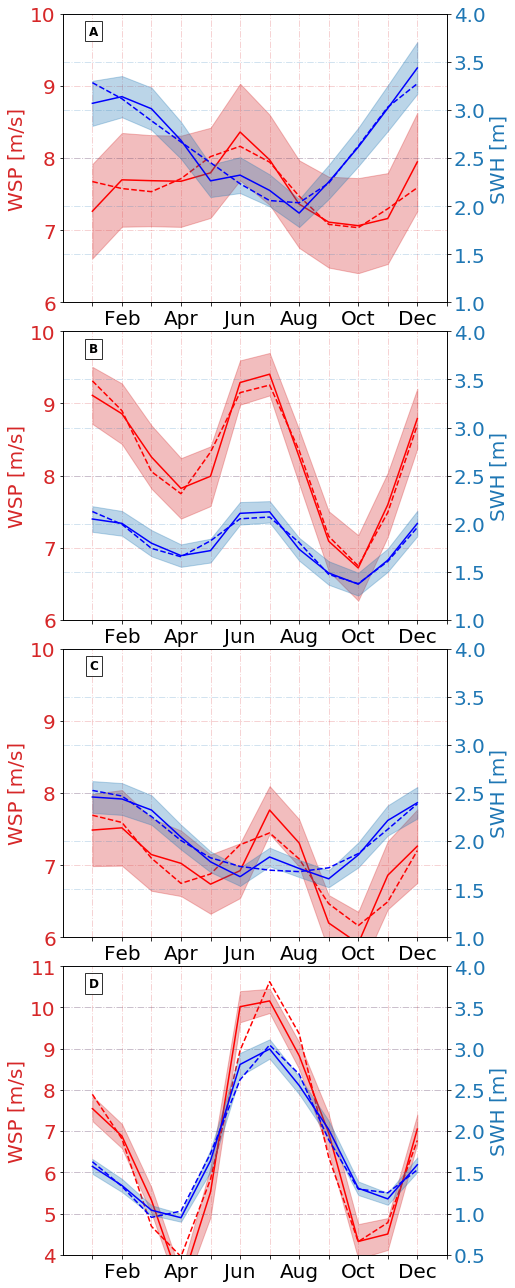

In [31]:
#initialize subplot axes: 
fig, axes = plt.subplots(4, 1, figsize=(7,18))
ax1, ax2, ax3, ax4 = axes.flatten()

#subplot labels and placement 
subplot_label = ['A', 'B', 'C', 'D']
subplot_p = [0, 1, 2, 3]
#x-axis tick labels for NH:
time_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

######## Subplot 1 ######## 
#California Coast 
region_clima_plot(ax1, swh_mean_nc, swh_stdm_nc, swh_hfit_nc, wsp_mean_nc, wsp_stdm_nc, wsp_hfit_nc, swh_model_mean_nc, swh_model_stdm_nc, wsp_model_mean_nc, wsp_model_stdm_nc, time, time_ticks, xlim, ylim, subplot_label='A', fontsize=20, task='IC')
print(swh_gc_nc)
########### Subplot 2 ###########
#South Caribbean Sea 
region_clima_plot(ax2, swh_mean_sc, swh_stdm_sc, swh_hfit_sc, wsp_mean_sc, wsp_stdm_sc, wsp_hfit_sc, swh_model_mean_sc, swh_model_stdm_sc, wsp_model_mean_sc, wsp_model_stdm_sc, time, time_ticks, xlim, ylim, subplot_label='B', fontsize=20, task='IC')
print(swh_gc_sc)
########### Subplot 3 ###########
#North Africa (Morocco) 
region_clima_plot(ax3, swh_mean_na, swh_stdm_na, swh_hfit_na, wsp_mean_na, wsp_stdm_na, wsp_hfit_na, swh_model_mean_na, swh_model_stdm_na, wsp_model_mean_na, wsp_model_stdm_na, time, time_ticks, xlim, ylim, subplot_label='C', fontsize=20, task='IC')
print(swh_gc_na)
########### Subplot 4 ###########
#Arabian Sea
region_clima_plot(ax4, swh_mean_as, swh_stdm_as, swh_hfit_as, wsp_mean_as, wsp_stdm_as, wsp_hfit_as, swh_model_mean_as, swh_model_stdm_as, wsp_model_mean_as, wsp_model_stdm_as, time, time_ticks, xlim, ylim = [[0.5,4],[4,11]] , subplot_label='D', fontsize=20, task='IC')
print(swh_gc_as)

#make sure the figure looks good:
fig.tight_layout()

#adjust spacing for the entire figure 
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/EBRs_reg_clima_4x4_nh_poster', bbox_inches = 'tight', dpi=300)

### Southern Hemisphere 

[-31. -28. 108. 111.]
[-36. -33. -77. -74.]
[-30. -27.  11.  14.]


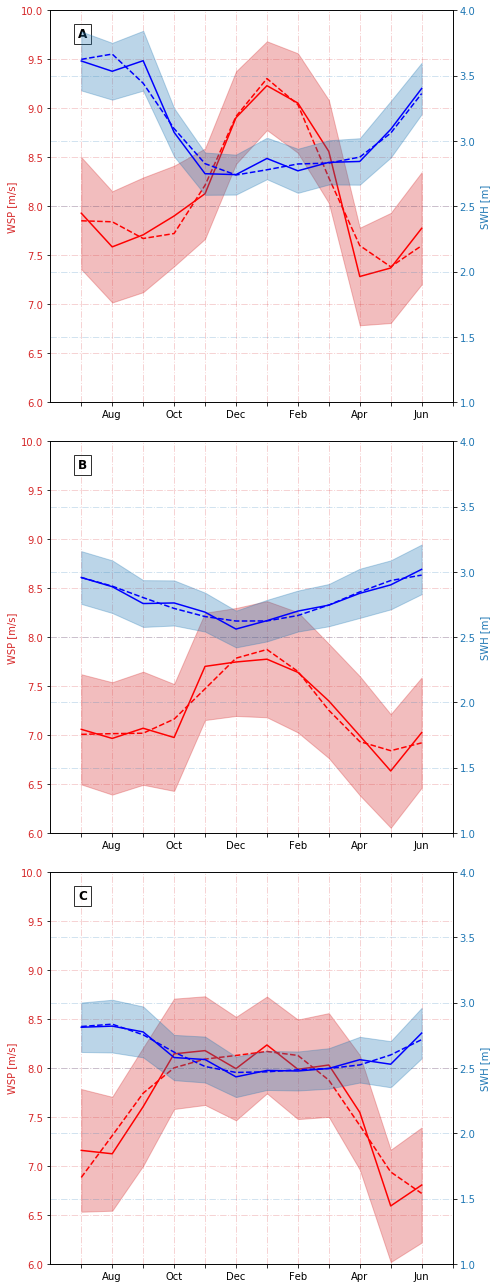

In [32]:
#initialize subplot axes: 
fig, axes = plt.subplots(3, 1, figsize=(7,18))
ax1, ax2, ax3 = axes.flatten()

#subplot labels and placement 
subplot_label = ['A', 'B', 'C']
subplot_p = [0, 1, 2]
#x-axis tick labels for SH:
time_ticks = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

######## Subplot 1 ######## 
#West Coast of Australia 
region_clima_plot(ax1, swh_mean_wa, swh_stdm_wa, swh_hfit_wa, wsp_mean_wa, wsp_stdm_wa, wsp_hfit_wa, swh_model_mean_wa, swh_model_stdm_wa, wsp_model_mean_wa, wsp_model_stdm_wa, time, time_ticks, xlim, ylim, subplot_label='A', fontsize=10, task='IC')
print(swh_gc_wa)
########### Subplot 2 ###########
#Peru-Chile Coast  
region_clima_plot(ax2, swh_mean_pc, swh_stdm_pc, swh_hfit_pc, wsp_mean_pc, wsp_stdm_pc, wsp_hfit_pc, swh_model_mean_pc, swh_model_stdm_pc, wsp_model_mean_pc, wsp_model_stdm_pc, time, time_ticks, xlim, ylim, subplot_label='B', fontsize=10, task='IC')
print(swh_gc_pc)
########### Subplot 3 ###########
#South Africa Coast (Namibia) 
region_clima_plot(ax3, swh_mean_sa, swh_stdm_sa, swh_hfit_sa, wsp_mean_sa, wsp_stdm_sa, wsp_hfit_sa, swh_model_mean_sa, swh_model_stdm_sa, wsp_model_mean_sa, wsp_model_stdm_sa, time, time_ticks, xlim, ylim, subplot_label='C', fontsize=10, task='IC')
print(swh_gc_sa)

#make sure the figure looks good:
fig.tight_layout()

#adjust spacing for the entire figure 
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/EBRs_reg_clima_4x4_sh_poster', bbox_inches = 'tight', dpi=300)


Plot Comparison climatologies with Ifremer SWh and CCMP2 with WW3

### North Hemisphere 

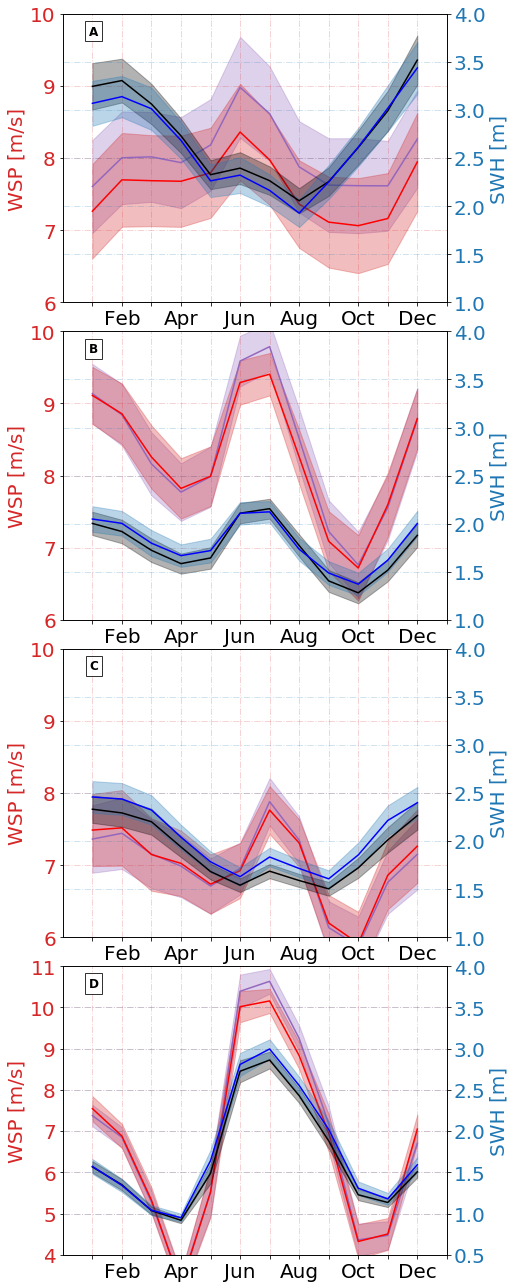

In [33]:
#initialize subplot axes: 
fig, axes = plt.subplots(4, 1, figsize=(7,18))
ax1, ax2, ax3, ax4 = axes.flatten()

#subplot labels and placement 
subplot_label = ['A', 'B', 'C', 'D']
subplot_p = [0, 1, 2, 3]
#x-axis tick labels for NH:
time_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

######## Subplot 1 ######## 
#California Coast 
region_clima_plot(ax1, swh_mean_nc, swh_stdm_nc, swh_hfit_nc, wsp_mean_nc, wsp_stdm_nc, wsp_hfit_nc, swh_model_mean_nc, swh_model_stdm_nc, wsp_model_mean_nc, wsp_model_stdm_nc, time, time_ticks, xlim, ylim, subplot_label='A', fontsize=20, task='ww3')
    
########### Subplot 2 ###########
#South Caribbean Sea 
region_clima_plot(ax2, swh_mean_sc, swh_stdm_sc, swh_hfit_sc, wsp_mean_sc, wsp_stdm_sc, wsp_hfit_sc, swh_model_mean_sc, swh_model_stdm_sc, wsp_model_mean_sc, wsp_model_stdm_sc, time, time_ticks, xlim, ylim, subplot_label='B', fontsize=20, task='ww3')

########### Subplot 3 ###########
#North Africa (Morocco) 
region_clima_plot(ax3, swh_mean_na, swh_stdm_na, swh_hfit_na, wsp_mean_na, wsp_stdm_na, wsp_hfit_na, swh_model_mean_na, swh_model_stdm_na, wsp_model_mean_na, wsp_model_stdm_na, time, time_ticks, xlim, ylim, subplot_label='C', fontsize=20, task='ww3')

########### Subplot 4 ###########
#Arabian Sea
region_clima_plot(ax4, swh_mean_as, swh_stdm_as, swh_hfit_as, wsp_mean_as, wsp_stdm_as, wsp_hfit_as, swh_model_mean_as, swh_model_stdm_as, wsp_model_mean_as, wsp_model_stdm_as, time, time_ticks, xlim, ylim = [[0.5,4],[4,11]], subplot_label='D', fontsize=20, task='ww3')
    
#make sure the figure looks good:
fig.tight_layout()

#adjust spacing for the entire figure 
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/EBRs_reg_clima_4x4_nh_ww3_poster', bbox_inches = 'tight', dpi=300)


### Southern Hemisphere 

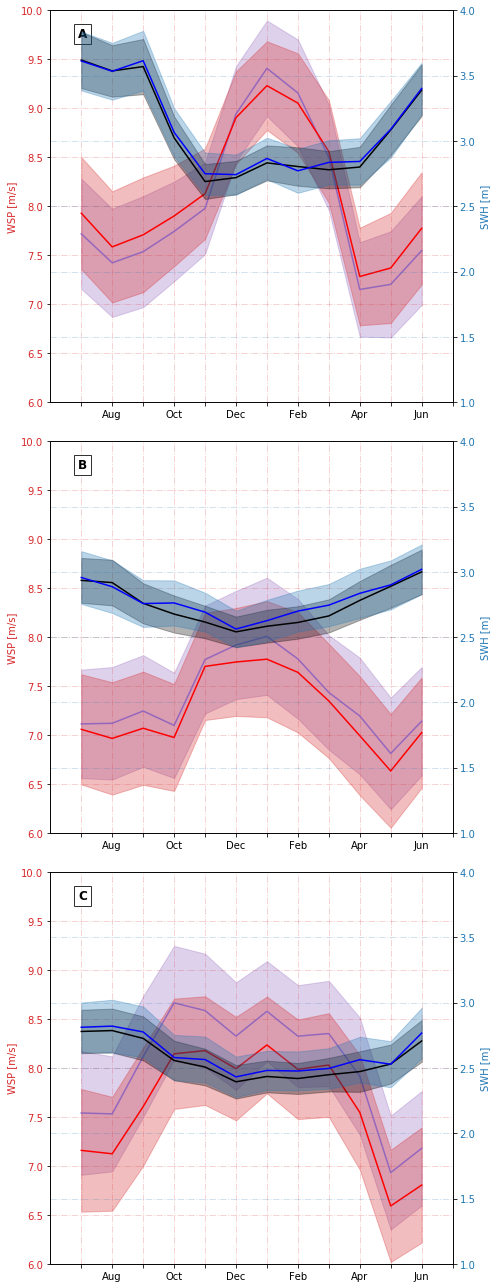

In [34]:
#initialize subplot axes: 
fig, axes = plt.subplots(3, 1, figsize=(7,18))
ax1, ax2, ax3 = axes.flatten()

#subplot labels and placement 
subplot_label = ['A', 'B', 'C']
subplot_p = [0, 1, 2]
#x-axis tick labels for SH:
time_ticks = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

######## Subplot 1 ######## 
#West Coast of Australia 
region_clima_plot(ax1, swh_mean_wa, swh_stdm_wa, swh_hfit_wa, wsp_mean_wa, wsp_stdm_wa, wsp_hfit_wa, swh_model_mean_wa, swh_model_stdm_wa, wsp_model_mean_wa, wsp_model_stdm_wa, time, time_ticks, xlim, ylim, subplot_label='A', fontsize=10, task='ww3')
    
########### Subplot 2 ###########
#Peru-Chile Coast  
region_clima_plot(ax2, swh_mean_pc, swh_stdm_pc, swh_hfit_pc, wsp_mean_pc, wsp_stdm_pc, wsp_hfit_pc, swh_model_mean_pc, swh_model_stdm_pc, wsp_model_mean_pc, wsp_model_stdm_pc, time, time_ticks, xlim, ylim, subplot_label='B', fontsize=10, task='ww3')

########### Subplot 3 ###########
#South Africa Coast (Namibia) 
region_clima_plot(ax3, swh_mean_sa, swh_stdm_sa, swh_hfit_sa, wsp_mean_sa, wsp_stdm_sa, wsp_hfit_sa, swh_model_mean_sa, swh_model_stdm_sa, wsp_model_mean_sa, wsp_model_stdm_sa, time, time_ticks, xlim, ylim, subplot_label='C', fontsize=10, task='ww3')
    
#make sure the figure looks good:
fig.tight_layout()

#adjust spacing for the entire figure 
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/EBRs_reg_clima_4x4_sh_ww3_poster', bbox_inches = 'tight', dpi=300)


Compute the residual between SWH model and SWH climatology for each regional climatology

### Northern Hemisphere 

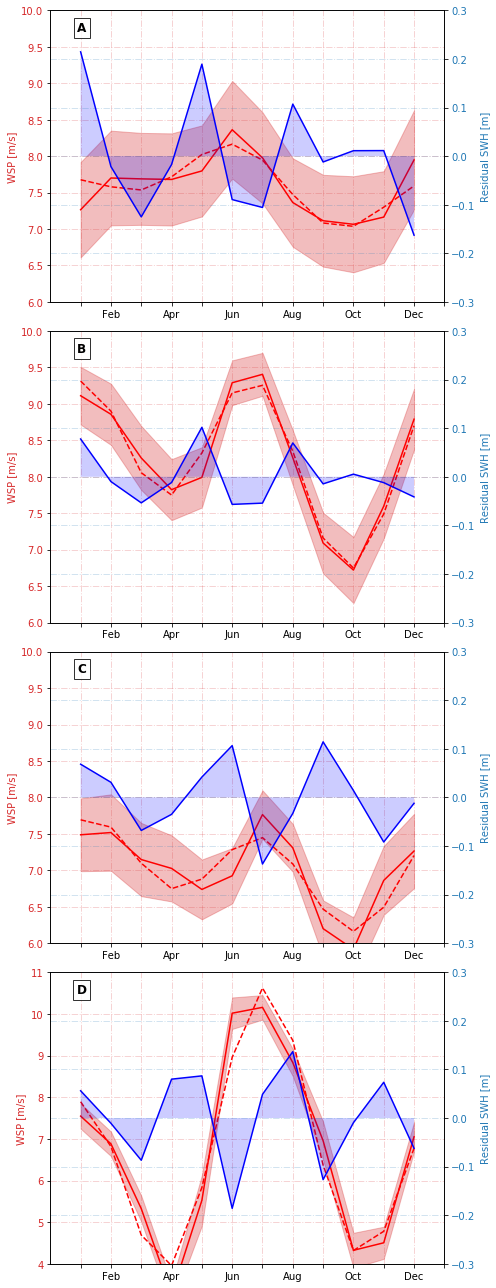

In [42]:
#initialize subplot axes: 
fig, axes = plt.subplots(4, 1, figsize=(7,18))
ax1, ax2, ax3, ax4 = axes.flatten()

#subplot labels and placement 
subplot_label = ['A', 'B', 'C', 'D']
subplot_p = [0, 1, 2, 3]
#x-axis tick labels for NH:
time_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

######## Subplot 1 ######## 
#California Coast 
region_clima_plot(ax1, swh_mean_nc, swh_stdm_nc, swh_hfit_nc, wsp_mean_nc, wsp_stdm_nc, wsp_hfit_nc, swh_model_mean_nc, swh_model_stdm_nc, wsp_model_mean_nc, wsp_model_stdm_nc, time, time_ticks, xlim, ylim = [[-0.3,0.3], [6,10]], subplot_label='A', fontsize=10, task='residual')
    
########### Subplot 2 ###########
#South Caribbean Sea 
region_clima_plot(ax2, swh_mean_sc, swh_stdm_sc, swh_hfit_sc, wsp_mean_sc, wsp_stdm_sc, wsp_hfit_sc, swh_model_mean_sc, swh_model_stdm_sc, wsp_model_mean_sc, wsp_model_stdm_sc, time, time_ticks, xlim, ylim = [[-0.3,0.3], [6,10]], subplot_label='B', fontsize=10, task='residual')

########### Subplot 3 ###########
#North Africa (Morocco) 
region_clima_plot(ax3, swh_mean_na, swh_stdm_na, swh_hfit_na, wsp_mean_na, wsp_stdm_na, wsp_hfit_na, swh_model_mean_na, swh_model_stdm_na, wsp_model_mean_na, wsp_model_stdm_na, time, time_ticks, xlim, ylim = [[-0.3,0.3], [6,10]], subplot_label='C', fontsize=10, task='residual')

########### Subplot 4 ###########
#Arabian Sea
region_clima_plot(ax4, swh_mean_as, swh_stdm_as, swh_hfit_as, wsp_mean_as, wsp_stdm_as, wsp_hfit_as, swh_model_mean_as, swh_model_stdm_as, wsp_model_mean_as, wsp_model_stdm_as, time, time_ticks, xlim, ylim = [[-0.3,0.3],[4,11]], subplot_label='D', fontsize=10, task='residual')
    
#make sure the figure looks good:
fig.tight_layout()

#adjust spacing for the entire figure 
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/SWARs_reg_clima_4x4_nh_res_paper', bbox_inches = 'tight', dpi=300)


### Southern Hemisphere 

[-31. -28. 108. 111.]
[-36. -33. -77. -74.]
[-30. -27.  11.  14.]


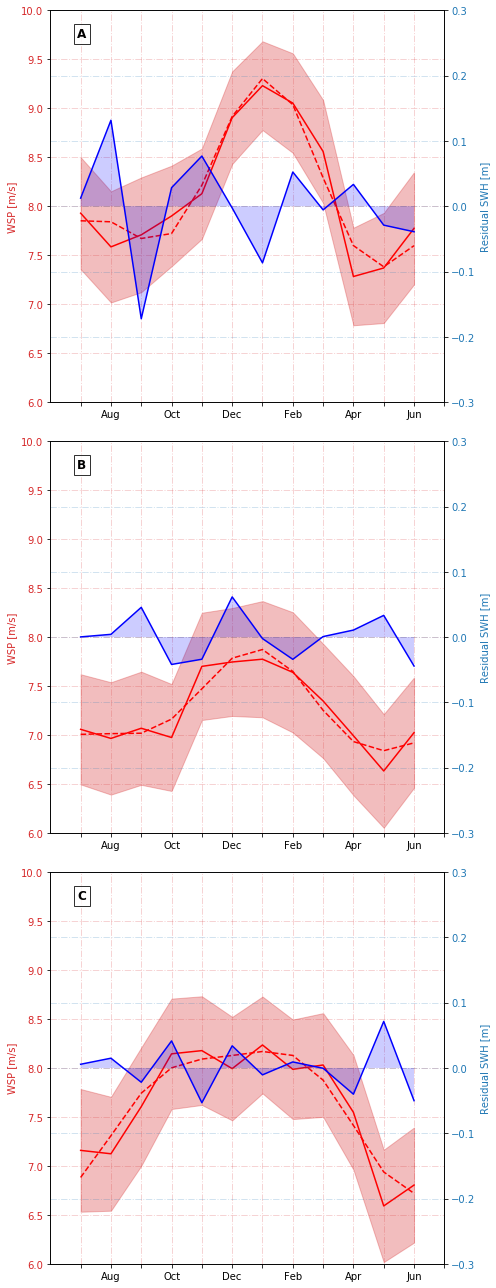

In [43]:
#initialize subplot axes: 
fig, axes = plt.subplots(3, 1, figsize=(7,18))
ax1, ax2, ax3 = axes.flatten()

#subplot labels and placement 
subplot_label = ['A', 'B', 'C']
subplot_p = [0, 1, 2]
#x-axis tick labels for SH:
time_ticks = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

######## Subplot 1 ######## 
#West Coast of Australia 
region_clima_plot(ax1, swh_mean_wa, swh_stdm_wa, swh_hfit_wa, wsp_mean_wa, wsp_stdm_wa, wsp_hfit_wa, swh_model_mean_wa, swh_model_stdm_wa, wsp_model_mean_wa, wsp_model_stdm_wa, time, time_ticks, xlim, ylim = [[-0.3,0.3], [6,10]], subplot_label='A', fontsize=10, task='residual')
print(swh_gc_wa)
########### Subplot 2 ###########
#Peru-Chile Coast  
region_clima_plot(ax2, swh_mean_pc, swh_stdm_pc, swh_hfit_pc, wsp_mean_pc, wsp_stdm_pc, wsp_hfit_pc, swh_model_mean_pc, swh_model_stdm_pc, wsp_model_mean_pc, wsp_model_stdm_pc, time, time_ticks, xlim, ylim = [[-0.3,0.3], [6,10]], subplot_label='B', fontsize=10, task='residual')
print(swh_gc_pc)
########### Subplot 3 ###########
#South Africa Coast (Namibia) 
region_clima_plot(ax3, swh_mean_sa, swh_stdm_sa, swh_hfit_sa, wsp_mean_sa, wsp_stdm_sa, wsp_hfit_sa, swh_model_mean_sa, swh_model_stdm_sa, wsp_model_mean_sa, wsp_model_stdm_sa, time, time_ticks, xlim, ylim = [[-0.3,0.3], [6,10]], subplot_label='C', fontsize=10, task='residual')
print(swh_gc_sa)

#make sure the figure looks good:
fig.tight_layout()

#adjust spacing for the entire figure 
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/SWARs_reg_clima_4x4_sh_res_paper', bbox_inches = 'tight', dpi=300)


Compute the Chi-square statistic for each regional climatology

### Northern Hemisphere 

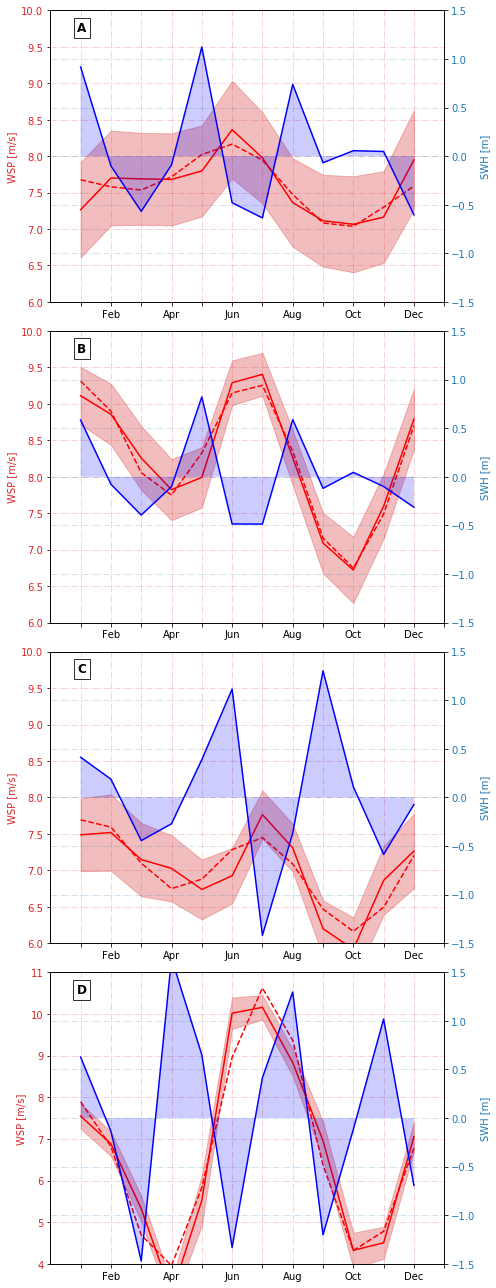

In [37]:
#initialize subplot axes: 
fig, axes = plt.subplots(4, 1, figsize=(7,18))
ax1, ax2, ax3, ax4 = axes.flatten()

#subplot labels and placement 
subplot_label = ['A', 'B', 'C', 'D']
subplot_p = [0, 1, 2, 3]
#x-axis tick labels for NH:
time_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

######## Subplot 1 ######## 
#California Coast 
region_clima_plot(ax1, swh_mean_nc, swh_stdm_nc, swh_hfit_nc, wsp_mean_nc, wsp_stdm_nc, wsp_hfit_nc, swh_model_mean_nc, swh_model_stdm_nc, wsp_model_mean_nc, wsp_model_stdm_nc, time, time_ticks, xlim, ylim = [[-1.5, 1.5], [6, 10]], subplot_label='A', fontsize=10, task='chi')
    
########### Subplot 2 ###########
#South Caribbean Sea 
region_clima_plot(ax2, swh_mean_sc, swh_stdm_sc, swh_hfit_sc, wsp_mean_sc, wsp_stdm_sc, wsp_hfit_sc, swh_model_mean_sc, swh_model_stdm_sc, wsp_model_mean_sc, wsp_model_stdm_sc, time, time_ticks, xlim, ylim = [[-1.5,1.5], [6,10]], subplot_label='B', fontsize=10, task='chi')

########### Subplot 3 ###########
#North Africa (Morocco) 
region_clima_plot(ax3, swh_mean_na, swh_stdm_na, swh_hfit_na, wsp_mean_na, wsp_stdm_na, wsp_hfit_na, swh_model_mean_na, swh_model_stdm_na, wsp_model_mean_na, wsp_model_stdm_na, time, time_ticks, xlim, ylim = [[-1.5,1.5], [6,10]], subplot_label='C', fontsize=10, task='chi')

########### Subplot 4 ###########
#Arabian Sea
region_clima_plot(ax4, swh_mean_as, swh_stdm_as, swh_hfit_as, wsp_mean_as, wsp_stdm_as, wsp_hfit_as, swh_model_mean_as, swh_model_stdm_as, wsp_model_mean_as, wsp_model_stdm_as, time, time_ticks, xlim, ylim = [[-1.5,1.5],[4,11]], subplot_label='D', fontsize=10, task='chi')
    
#make sure the figure looks good:
fig.tight_layout()

#adjust spacing for the entire figure 
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/SWARs_reg_clima_4x4_nh_chi_paper', bbox_inches = 'tight', dpi=300)


### Southern Hemisphere 

[-31. -28. 108. 111.]
[-36. -33. -77. -74.]
[-30. -27.  11.  14.]


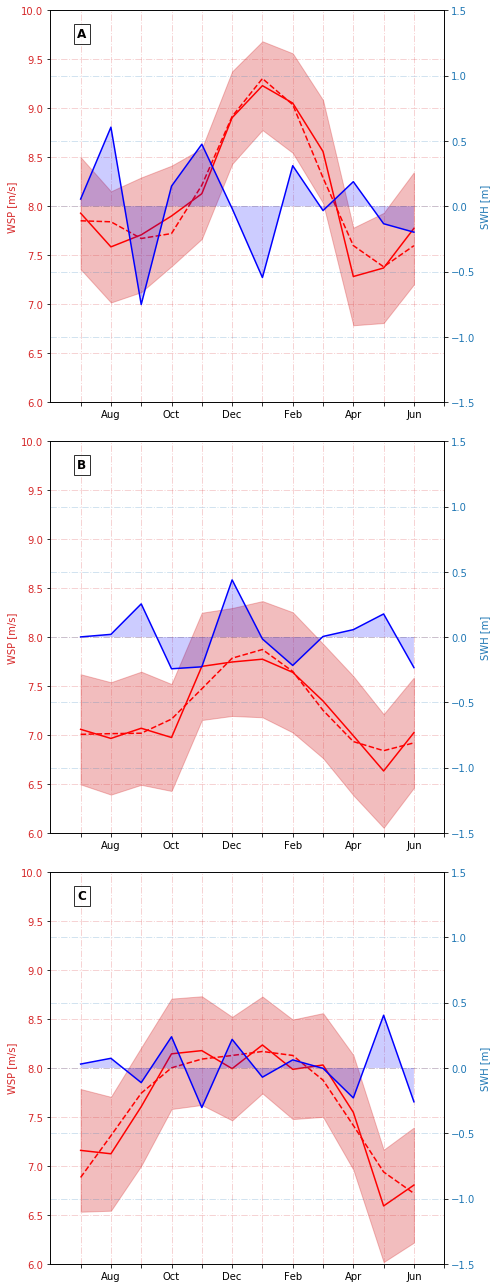

In [38]:
#initialize subplot axes: 
fig, axes = plt.subplots(3, 1, figsize=(7,18))
ax1, ax2, ax3 = axes.flatten()

#subplot labels and placement 
subplot_label = ['A', 'B', 'C']
subplot_p = [0, 1, 2]
#x-axis tick labels for SH:
time_ticks = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

######## Subplot 1 ######## 
#West Coast of Australia 
region_clima_plot(ax1, swh_mean_wa, swh_stdm_wa, swh_hfit_wa, wsp_mean_wa, wsp_stdm_wa, wsp_hfit_wa, swh_model_mean_wa, swh_model_stdm_wa, wsp_model_mean_wa, wsp_model_stdm_wa, time, time_ticks, xlim, ylim = [[-1.5,1.5], [6,10]], subplot_label='A', fontsize=10, task='chi')
print(swh_gc_wa)
########### Subplot 2 ###########
#Peru-Chile Coast  
region_clima_plot(ax2, swh_mean_pc, swh_stdm_pc, swh_hfit_pc, wsp_mean_pc, wsp_stdm_pc, wsp_hfit_pc, swh_model_mean_pc, swh_model_stdm_pc, wsp_model_mean_pc, wsp_model_stdm_pc, time, time_ticks, xlim, ylim = [[-1.5,1.5], [6,10]], subplot_label='B', fontsize=10, task='chi')
print(swh_gc_pc)
########### Subplot 3 ###########
#South Africa Coast (Namibia) 
region_clima_plot(ax3, swh_mean_sa, swh_stdm_sa, swh_hfit_sa, wsp_mean_sa, wsp_stdm_sa, wsp_hfit_sa, swh_model_mean_sa, swh_model_stdm_sa, wsp_model_mean_sa, wsp_model_stdm_sa, time, time_ticks, xlim, ylim = [[-1.5,1.5], [6,10]], subplot_label='C', fontsize=10, task='chi')
print(swh_gc_sa)

#make sure the figure looks good:
fig.tight_layout()

#adjust spacing for the entire figure 
plt.subplots_adjust(wspace = 0.35, hspace = 0.1)

#save figure: 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/SWARs_reg_clima_4x4_sh_chi_paper', bbox_inches = 'tight', dpi=300)


Combine the Zoomed in regional maps with the regional climatologies for the southern and northern hemisphere respectively 

### Northern Hemisphere

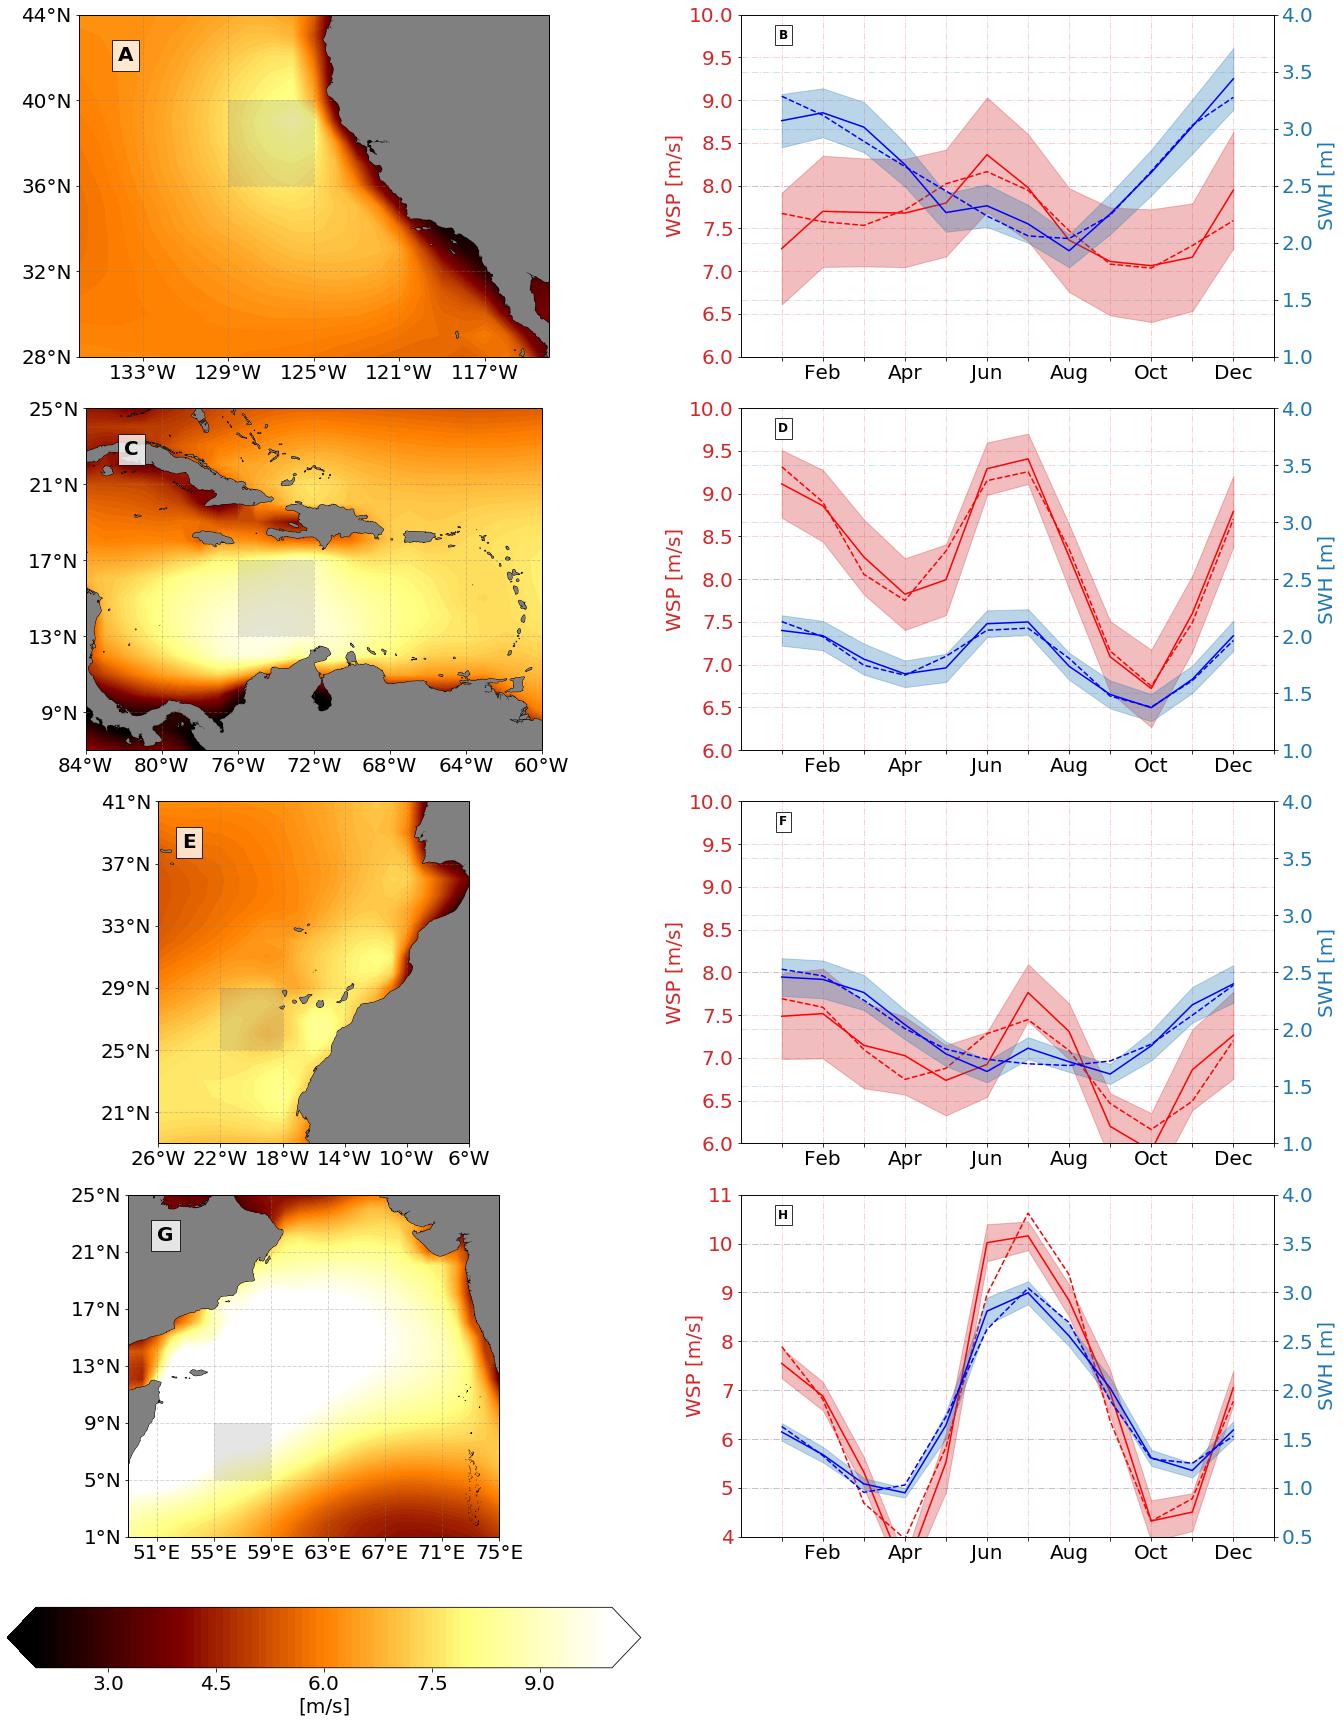

In [39]:
projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '10m'

#initialize subplot axes:
fig = plt.figure(figsize=(22,28))

#x-axis tick labels for NH:
time_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

############## Subplot 1  #################
#California coast
ax1 = fig.add_subplot(421, projection = ccrs.PlateCarree(central_longitude=180.0))
cart.set_subplots(ax1, projection, resolution, lon_min=44, lon_max=66, lat_min=30, lat_max=44)
levels = np.arange(2, 10.1, 0.1)
cs1 = ax1.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cm.afmhot,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
#cs1 = ax1.pcolor(lon, lat, wsp_mean_s[2,:,:], vmin=0, vmax=8, cmap=cmo.thermal, 
#                 transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax1, xticks = [-133, -129, -125, -121, -117], yticks = [28, 32, 36, 40, 44], fontsize=20, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
#left, bottom, width, height
cax1 = plt.axes([.1, .06, 0.4, 0.03])
cart.set_cbar(cs1, cax1, fig, orientation='horizontal', cbar_label ='[m/s]', nbins = 7, fontsize = 20, cbar_ticks=[], task='regular')
#cart.set_axes_label(ax1, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 20)
ax1.add_patch(mpatches.Rectangle(xy=[-129, 36], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

######## Subplot 3 ######## 
#California Coast 
ax2 = fig.add_subplot(422)
region_clima_plot(ax2, swh_mean_nc, swh_stdm_nc, swh_hfit_nc, wsp_mean_nc, wsp_stdm_nc, wsp_hfit_nc, swh_model_mean_nc, swh_model_stdm_nc, wsp_model_mean_nc, wsp_model_stdm_nc, time, time_ticks, xlim, ylim, subplot_label='B', fontsize=20, task='IC')

############## Subplot 4  #################
#South Caribbean
ax3 = fig.add_subplot(423, projection = ccrs.PlateCarree(central_longitude=180.0))
cart.set_subplots(ax3, projection, resolution, lon_min=97, lon_max=119, lat_min=7, lat_max=24)
levels = np.arange(2, 10.1, 0.1)
cs3 = ax3.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cm.afmhot,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax3, xticks = [-84, -80, -76, -72, -68, -64, -60], yticks = [9, 13, 17, 21, 25], fontsize=20, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'C', fs_shade = 28, fs_main = 20)
ax3.add_patch(mpatches.Rectangle(xy=[-76, 13], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

########### Subplot 5 ###########
#South Caribbean Sea 
ax4 = fig.add_subplot(424)
region_clima_plot(ax4, swh_mean_sc, swh_stdm_sc, swh_hfit_sc, wsp_mean_sc, wsp_stdm_sc, wsp_hfit_sc, swh_model_mean_sc, swh_model_stdm_sc, wsp_model_mean_sc, wsp_model_stdm_sc, time, time_ticks, xlim, ylim, subplot_label='D', fontsize=20, task='IC')

# ############## Subplot 6  #################
#North Africa
ax5 = fig.add_subplot(425, projection = ccrs.PlateCarree(central_longitude=180.0))
cart.set_subplots(ax5, projection, resolution, lon_min=154, lon_max=174, lat_min=19, lat_max=34)
levels = np.arange(2, 10.1, 0.1)
cs5 = ax5.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cm.afmhot,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax5, xticks = [-26, -22, -18, -14, -10, -6], yticks = [21, 25, 29, 33, 37, 41], fontsize=20, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax5, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'E', fs_shade = 28, fs_main = 20)
ax5.add_patch(mpatches.Rectangle(xy=[-22, 25], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))
########### Subplot 7 ###########
#North Africa (Morocco) 
ax6 = fig.add_subplot(426)
region_clima_plot(ax6, swh_mean_na, swh_stdm_na, swh_hfit_na, wsp_mean_na, wsp_stdm_na, wsp_hfit_na, swh_model_mean_na, swh_model_stdm_na, wsp_model_mean_na, wsp_model_stdm_na, time, time_ticks, xlim, ylim, subplot_label='F', fontsize=20, task='IC')

# ############## Subplot 8  #################
# #Arabian Sea 
ax7 = fig.add_subplot(427, projection = ccrs.PlateCarree(central_longitude=180.0))
cart.set_subplots(ax7, projection, resolution, lon_min=-131, lon_max=-109, lat_min=6, lat_max=23)
levels = np.arange(2, 10.1, 0.1)
cs7 = ax7.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cm.afmhot,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax7, xticks = [51, 55, 59, 63, 67, 71, 75], yticks = [1, 5, 9, 13, 17, 21, 25], fontsize=20, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax7, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'G', fs_shade = 28, fs_main = 20)
ax7.add_patch(mpatches.Rectangle(xy=[55, 5], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

########### Subplot 4 ###########
#Arabian Sea
ax8 = fig.add_subplot(428)
region_clima_plot(ax8, swh_mean_as, swh_stdm_as, swh_hfit_as, wsp_mean_as, wsp_stdm_as, wsp_hfit_as, swh_model_mean_as, swh_model_stdm_as, wsp_model_mean_as, wsp_model_stdm_as, time, time_ticks, xlim, ylim = [[0.5,4],[4,11]], subplot_label='H', fontsize=20, task='IC')

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.3, hspace = 0.15)

#save figure 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/poster_regional_clima_nh', bbox_inches = 'tight', dpi=300)


### Southern Hemisphere 

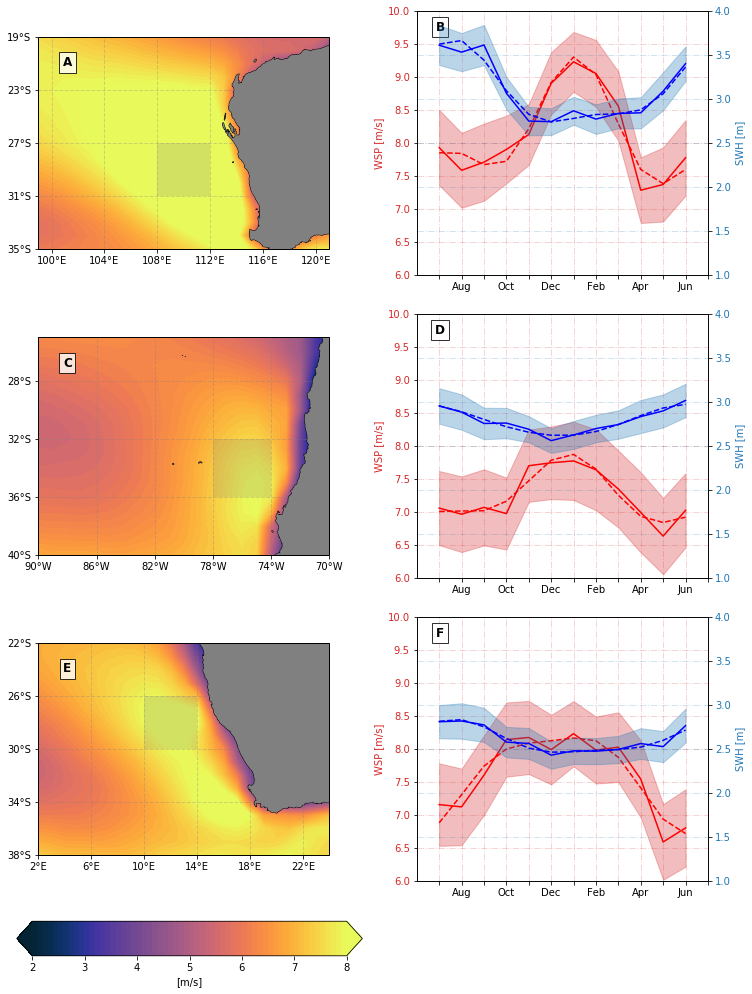

In [40]:
projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '10m'

#initialize subplot axes:
#fig = plt.figure(figsize=(22,28))
fig = plt.figure(figsize=(12,16))

#x-axis tick labels for SH:
time_ticks = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

############## Subplot 1  #################
#West coast of Australia
ax1 = fig.add_subplot(321, projection = ccrs.PlateCarree(central_longitude=180.0))
cart.set_subplots(ax1, projection, resolution, lon_min=-81, lon_max=-59, lat_min=-35, lat_max=-20)
levels = np.arange(2, 8.1, 0.1)
cs1 = ax1.contourf(lon, lat, wsp_mean_s[0,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
#cs1 = ax1.pcolor(lon, lat, wsp_mean_s[2,:,:], vmin=0, vmax=8, cmap=cmo.thermal, 
#                 transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax1, xticks = [100, 104, 108, 112, 116, 120], yticks = [-35, -31, -27, -23, -19], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
#left, bottom, width, height
cax1 = plt.axes([.1, .06, 0.4, 0.03])
cart.set_cbar(cs1, cax1, fig, orientation='horizontal', cbar_label ='[m/s]', nbins = 7, fontsize = 10, cbar_ticks=[], task='regular')
#cart.set_axes_label(ax1, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 12)
ax1.add_patch(mpatches.Rectangle(xy=[108, -31], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))
######## Subplot 2 ######## 
#West Coast of Australia 
ax2 = fig.add_subplot(322)
region_clima_plot(ax2, swh_mean_wa, swh_stdm_wa, swh_hfit_wa, wsp_mean_wa, wsp_stdm_wa, wsp_hfit_wa, swh_model_mean_wa, swh_model_stdm_wa, wsp_model_mean_wa, wsp_model_stdm_wa, time, time_ticks, xlim, ylim, subplot_label='B', fontsize=10, task='IC')


############## Subplot 3  #################
#Chile-Peru Coast 
ax3 = fig.add_subplot(323, projection = ccrs.PlateCarree(central_longitude=180.0))
cart.set_subplots(ax3, projection, resolution, lon_min=92, lon_max=109, lat_min=-40, lat_max=-25)
levels = np.arange(2, 8.1, 0.1)
cs3 = ax3.contourf(lon, lat, wsp_mean_s[0,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax3, xticks = [-90, -86, -82, -78, -74, -70], yticks = [-40, -36, -32, -28], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'C', fs_shade = 28, fs_main = 12)
ax3.add_patch(mpatches.Rectangle(xy=[-78, -36], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

########### Subplot 4 ###########
#Peru-Chile Coast  
ax4 = fig.add_subplot(324)
region_clima_plot(ax4, swh_mean_pc, swh_stdm_pc, swh_hfit_pc, wsp_mean_pc, wsp_stdm_pc, wsp_hfit_pc, swh_model_mean_pc, swh_model_stdm_pc, wsp_model_mean_pc, wsp_model_stdm_pc, time, time_ticks, xlim, ylim, subplot_label='D', fontsize=10, task='IC')


# ############## Subplot 3  #################
#Coast of Namibia
ax5 = fig.add_subplot(325, projection = ccrs.PlateCarree(central_longitude=180.0))
cart.set_subplots(ax5, projection, resolution, lon_min=-178, lon_max=-156, lat_min=-38, lat_max=-23)
levels = np.arange(2, 8.1, 0.1)
cs5 = ax5.contourf(lon, lat, wsp_mean_s[0,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax5, xticks = [2, 6, 10, 14, 18, 22], yticks = [-38, -34, -30, -26, -22], fontsize=10, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax5, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'E', fs_shade = 28, fs_main = 12)
ax5.add_patch(mpatches.Rectangle(xy=[10, -30], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

########### Subplot 3 ###########
#South Africa Coast (Namibia) 
ax6 = fig.add_subplot(326)
region_clima_plot(ax6, swh_mean_sa, swh_stdm_sa, swh_hfit_sa, wsp_mean_sa, wsp_stdm_sa, wsp_hfit_sa, swh_model_mean_sa, swh_model_stdm_sa, wsp_model_mean_sa, wsp_model_stdm_sa, time, time_ticks, xlim, ylim, subplot_label='F', fontsize=10, task='IC')

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.3, hspace = 0.15)

#save figure 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/poster_regional_clima_sh', bbox_inches = 'tight', dpi=300)


TypeError: set_cbar() missing 2 required positional arguments: 'cbar_ticks' and 'task'

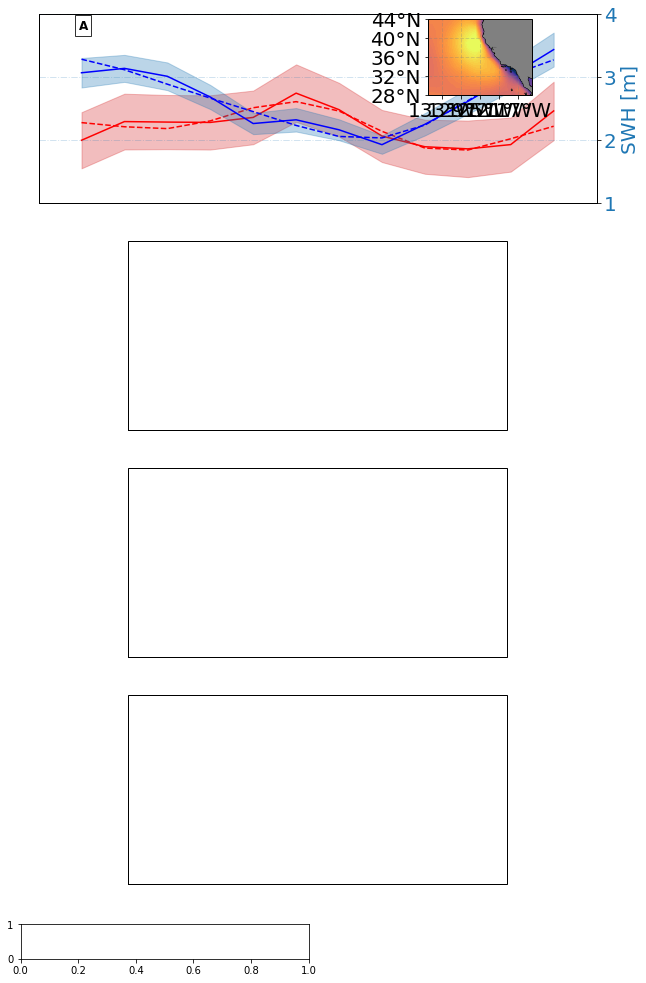

In [41]:
#import libraries
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '10m'

#initialize subplot axes:
fig, axes = plt.subplots(4, 1, figsize=(10,16),
                        subplot_kw={'projection': projection})
ax1, ax2, ax3, ax4 = axes.flatten()

# fig, axes = plt.subplots(4, 2, figsize=(10,16))
# _, ax2, _, ax4, _, ax6, _, ax8 = axes.flatten()

#x-axis tick labels for SH:
time_ticks = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

######## Subplot 1 ######## 
#California Coast 
region_clima_plot(ax1, swh_mean_nc, swh_stdm_nc, swh_hfit_nc, wsp_mean_nc, wsp_stdm_nc, wsp_hfit_nc, swh_model_mean_nc, swh_model_stdm_nc, wsp_model_mean_nc, wsp_model_stdm_nc, time, time_ticks, xlim, ylim, subplot_label='A', fontsize=20, task='IC')

############## Sub-subplot 2  #################
#California coast
axins = inset_axes(ax1, width="40%", height="40%", loc="upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.PlateCarree()))
cart.set_subplots(axins, projection, resolution, lon_min=44, lon_max=66, lat_min=30, lat_max=44)
levels = np.arange(2, 8.1, 0.1)
cs1 = axins.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
#cs1 = ax1.pcolor(lon, lat, wsp_mean_s[2,:,:], vmin=0, vmax=8, cmap=cmo.thermal, 
#                 transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=axins, xticks = [-133, -129, -125, -121, -117], yticks = [28, 32, 36, 40, 44], fontsize=20, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
#left, bottom, width, height
cax1 = plt.axes([.1, .06, 0.4, 0.03])
cart.set_cbar(cs1, cax1, fig, orientation='horizontal', cbar_label ='[m/s]', nbins = 7, fontsize = 10)
#cart.set_axes_label(ax1, xdist_lat = -0.1, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.25, fontsize = 15)
cart.subplot_label(axins, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'A', fs_shade = 28, fs_main = 12)
axins.add_patch(mpatches.Rectangle(xy=[-129, 36], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

############## Subplot 4  #################
#South Caribbean
cart.set_subplots(ax3, projection, resolution, lon_min=97, lon_max=119, lat_min=7, lat_max=24)
levels = np.arange(2, 8.1, 0.1)
cs3 = ax3.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax3, xticks = [-84, -80, -76, -72, -68, -64, -60], yticks = [9, 13, 17, 21, 25], fontsize=20, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'C', fs_shade = 28, fs_main = 12)
ax3.add_patch(mpatches.Rectangle(xy=[-76, 13], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

########### Subplot 5 ###########
#South Caribbean Sea 
region_clima_plot(ax4, swh_mean_sc, swh_stdm_sc, swh_hfit_sc, wsp_mean_sc, wsp_stdm_sc, wsp_hfit_sc, swh_model_mean_sc, swh_model_stdm_sc, wsp_model_mean_sc, wsp_model_stdm_sc, time, time_ticks, xlim, ylim, subplot_label='D', fontsize=20, task='IC')

# ############## Subplot 6  #################
#North Africa
cart.set_subplots(ax5, projection, resolution, lon_min=154, lon_max=174, lat_min=19, lat_max=34)
levels = np.arange(2, 8.1, 0.1)
cs5 = ax5.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax5, xticks = [-26, -22, -18, -14, -10, -6], yticks = [21, 25, 29, 33, 37, 41], fontsize=20, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax5, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'E', fs_shade = 28, fs_main = 12)
ax5.add_patch(mpatches.Rectangle(xy=[-22, 25], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))
########### Subplot 3 ###########
#North Africa (Morocco) 
region_clima_plot(ax6, swh_mean_na, swh_stdm_na, swh_hfit_na, wsp_mean_na, wsp_stdm_na, wsp_hfit_na, swh_model_mean_na, swh_model_stdm_na, wsp_model_mean_na, wsp_model_stdm_na, time, time_ticks, xlim, ylim, subplot_label='F', fontsize=20, task='IC')

# ############## Subplot 4  #################
# #Arabian Sea 
cart.set_subplots(ax7, projection, resolution, lon_min=-131, lon_max=-109, lat_min=6, lat_max=23)
levels = np.arange(2, 8.1, 0.1)
cs7 = ax7.contourf(lon, lat, wsp_mean_s[2,:,:], levels=levels, cmap=cmo.thermal,
                  extend='both', transform=ccrs.PlateCarree(central_longitude=0.0))
grid_labels_lines(ax=ax7, xticks = [51, 55, 59, 63, 67, 71, 75], yticks = [1, 5, 9, 13, 17, 21, 25], fontsize=20, linewidth=1, color='gray', alpha=0.3, linestyle='--', task='grid on')
cart.subplot_label(ax7, xdist_label = 0.1, ydist_label = 0.88, subplot_label = 'G', fs_shade = 28, fs_main = 12)
ax7.add_patch(mpatches.Rectangle(xy=[55, 5], width=4, height=4,
                                    facecolor='gray',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree()))

########### Subplot 4 ###########
#Arabian Sea
region_clima_plot(ax8, swh_mean_as, swh_stdm_as, swh_hfit_as, wsp_mean_as, wsp_stdm_as, wsp_hfit_as, swh_model_mean_as, swh_model_stdm_as, wsp_model_mean_as, wsp_model_stdm_as, time, time_ticks, xlim, ylim, subplot_label='H', fontsize=20, task='IC')

#adjust spacing for the entire figure (not the subplot)
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)

#save figure 
plt.savefig(fname = '/zdata/downloads/colosi_data_bk/surfacewaves_python_figs/region_clima_fig/paper_regional_clima_nh', bbox_inches = 'tight', dpi=300)


### Developmental code 

In [ ]:
print(lon.shape)
print(lat.shape) 
print(wsp_mean_s[2,:,:].shape)

In [ ]:
173-151


In [ ]:
119-97


In [ ]:
patches.Rectangle?

In [ ]:
np.log10?

In [ ]:
np.log10(1)

In [ ]:
np.log10(np.arange(1, 8.1, 0.1))

In [ ]:
patches.Rectangle?

In [ ]:
print(-252.+360, -249.+360)

In [ ]:
cbar = fig.colorbar(cs1, cax=cax1, extend='both')
cbar.ax.set_ylabel

Test fill function 

In [ ]:
#set variables
x = np.arange(1,21)
y = np.arange(1,21,1)**2
print(x.shape, y.shape)

#plot variables with fill
fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.plot(x,y)
ax.fill_between(x, 0, y, facecolor='blue', alpha=0.3)

In [ ]:
ax.fill_between?


In [ ]:
np.zeros(20)


In [ ]:
region_clima_plot?

In [ ]:
8*6